In [1]:
import pandas as pd 
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [40]:
df = pd.read_excel(r'C:\Users\25372\Desktop\data2.xlsx')#H:\财务分析\BLBL\vscode绘图\income.xlsx
df['ds']=pd.to_datetime(df['ds'])
df['cap']=4050
model=Prophet(growth='logistic',
              yearly_seasonality=10,          
              )
# model=Prophet(
#     growth='linear',
#     seasonality_mode='additive',
#     daily_seasonality = True,
#     weekly_seasonality=3
#                             )#logistic linear
model.fit(df) 
future = model.make_future_dataframe(periods=13, freq='Q')
future['cap']=4050
future['floor']=0
forecast = model.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
1207,2023-03-31,1629.122436,1485.889453,1779.794882
1208,2023-06-30,1721.026469,1578.314464,1864.204014
1209,2023-09-30,3443.833739,3277.077071,3615.209235
1210,2023-12-31,3398.831865,3174.627794,3611.449999
1211,2024-03-31,3288.681923,3002.760150,3550.813887
1212,2024-06-30,3378.741216,3034.250697,3703.325426
1213,2024-09-30,1448.777707,1031.441064,1825.406825
1214,2024-12-31,1408.123984,950.511162,1901.034835
1215,2025-03-31,1291.569750,742.095786,1818.899621
1216,2025-06-30,1382.508979,784.329757,2042.074655


In [35]:
# type(forecast)

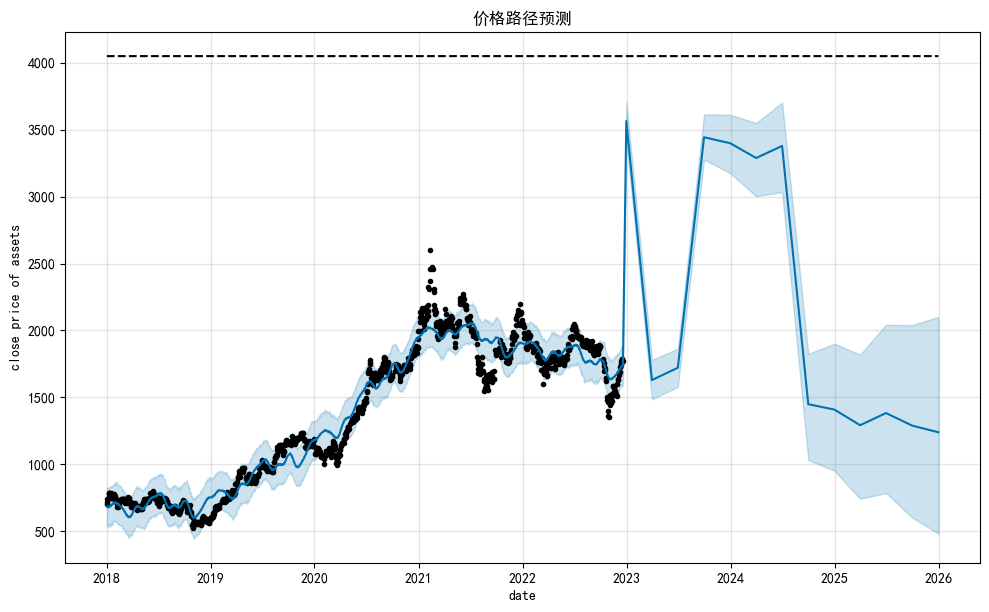

In [42]:
model.plot(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title('价格路径预测')
plt.xlabel('date')
plt.ylabel('close price of assets')
plt.show()

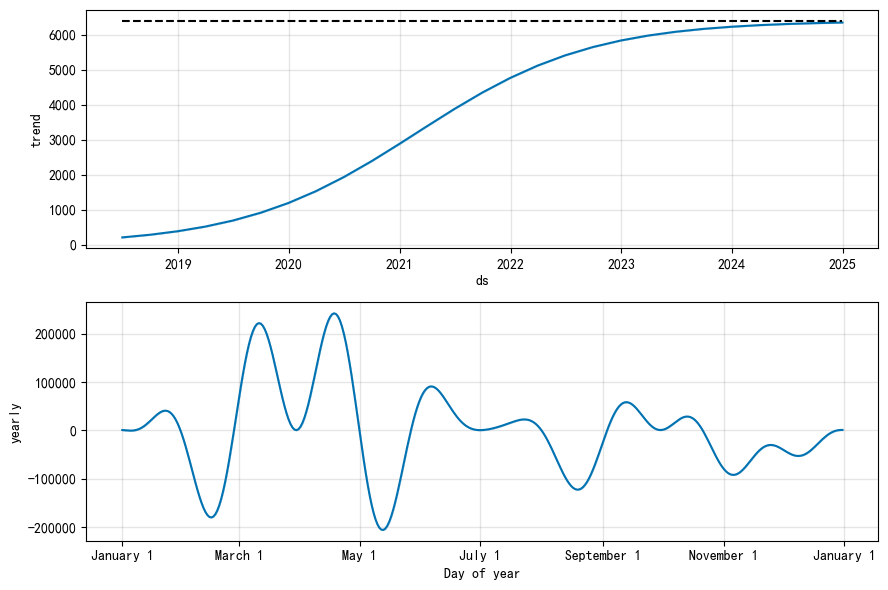

In [58]:
model.plot_components(forecast)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.show()

In [60]:
forecast.to_excel(r'H:\财务分析\BLBL\vscode绘图\forcast\income_f.xlsx',sheet_name='sheet1')